# Импорт модулей

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, LassoLars, Lasso, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

import xgboost as xgb
import lightgbm as lgb

from scipy import stats
from scipy.stats import norm, skew

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings('ignore')

!pip install catboost
import catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


# Работа с данными

In [80]:
data = pd.read_csv("SCI_and_preferences.csv", encoding="utf-8").iloc[:, 1:]

In [82]:
data = data.drop_duplicates(subset=data.columns[2:]).reset_index(drop=True)

In [84]:
data = data.iloc[:, 2:]

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

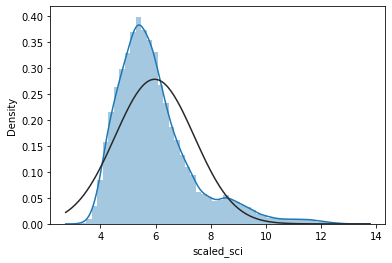

In [ ]:
sns.distplot(np.log(y) , fit=norm)
plt.show()

In [ ]:
y_train, y_test = np.log(y_train), np.log(y_test)

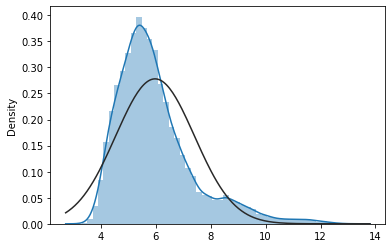

In [ ]:
sns.distplot(y_train , fit=norm)
plt.show()

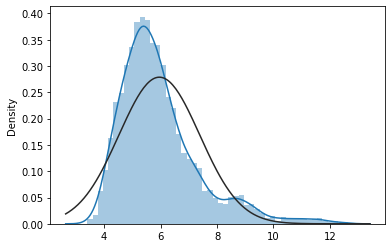

In [ ]:
sns.distplot(y_test , fit=norm)
plt.show()

# Построение моделей

In [ ]:
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
boosting_reg = catboost.CatBoostRegressor(eval_metric='RMSE', logging_level='Silent', random_state=0)

In [ ]:
boosting_reg.grid_search({'iterations': [300, 500, 1000], 'learning_rate': [0.1, 0.3]}, 
                           X_train, y_train, verbose=False, plot=True, refit=True, cv=5)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
print('train MAE = {}'.format(mean_absolute_error(y_train, boosting_reg.predict(X_train))))

train MAE = 0.2715580104607945


In [ ]:
print('test MAE = {}'.format(mean_absolute_error(y_test, boosting_reg.predict(X_test))))

test MAE = 0.45932940905419706


In [ ]:
print('train MAPE = {}%'.format(mape(y_train, boosting_reg.predict(X_train))))

train MAPE = 4.581648998180053%


In [ ]:
print('test MAPE = {}%'.format(mape(y_test, boosting_reg.predict(X_test))))

test MAPE = 7.612969771567661%


In [ ]:
print('train R_squared = {}'.format(r2_score(y_train, boosting_reg.predict(X_train))))

train R_squared = 0.9362569582864119


In [ ]:
print('test R_squared = {}'.format(r2_score(y_test, boosting_reg.predict(X_test))))

test R_squared = 0.7924687208561433


In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_train, y_train)

0.34061119662893036

In [ ]:
lin_reg.score(X_test, y_test)

0.3327828406818354

In [ ]:
print('train MAPE = {}%'.format(mape(y_train, lin_reg.predict(X_train))))

train MAPE = 14.884142675232864%


In [ ]:
print('test MAPE = {}%'.format(mape(y_test, lin_reg.predict(X_test))))

test MAPE = 14.98223287298642%
